In [5]:
pip install flask joblib scikit-learn



   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------------------------------------- 0/4 [werkzeug]
   ---------- ----------------------------- 1/4 [itsdangerous]
   ------------------------------ --------- 3/4 [flask]
   ------------------------------ --------- 3/4 [flask]
   ---------------------------------------- 4/4 [flask]

Note: you may need to restart the kernel to use updated packages.



================= Logistic Regression =================
Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.49      0.58        51
           1       0.84      0.93      0.89       149

    accuracy                           0.82       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.81      0.82      0.81       200



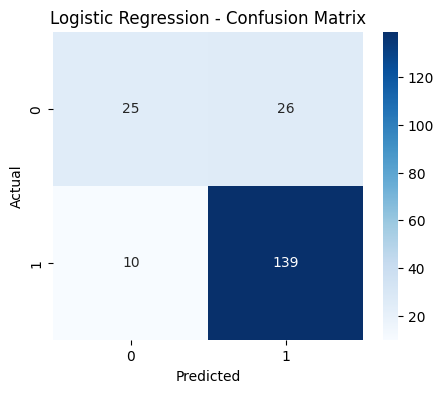


================= Random Forest =================
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        51
           1       0.97      1.00      0.99       149

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



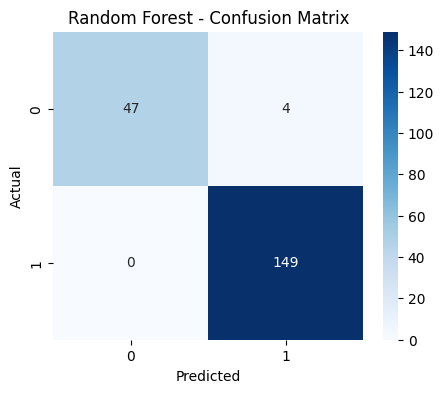


================= SVM =================
Accuracy: 0.745

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.74      1.00      0.85       149

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200



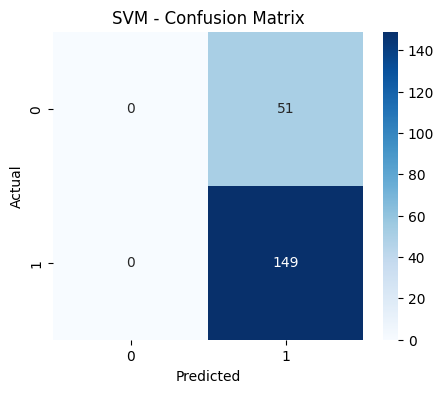

In [2]:
# ------------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------
# 2. Load Dataset
# ------------------------------------------------------
df = pd.read_csv("should_i_bunk_dataset.csv")   # Change path if needed

# ------------------------------------------------------
# 3. Encode Target (Yes/No → 1/0)
# ------------------------------------------------------
le = LabelEncoder()
df["should_bunk"] = le.fit_transform(df["should_bunk"])   # Yes=1, No=0

# ------------------------------------------------------
# 4. Split Features & Target
# ------------------------------------------------------
X = df.drop(columns=["should_bunk"])
y = df["should_bunk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------
# 5. Train Models
# ------------------------------------------------------

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# ------------------------------------------------------
# 6. Predictions
# ------------------------------------------------------
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# ------------------------------------------------------
# 7. Evaluation Function
# ------------------------------------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n================= {name} =================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------------------------------------
# 8. Evaluate All Models
# ------------------------------------------------------
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)


Accuracy: 0.985

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.98      1.00      0.99       149

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



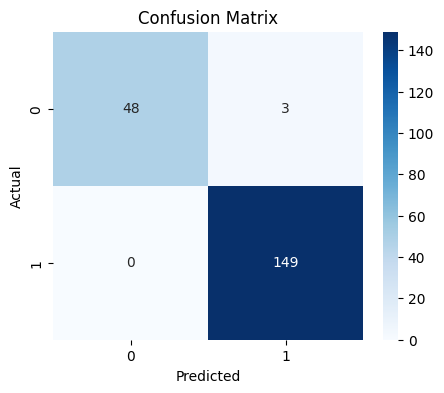


Model saved as should_i_bunk_model.pkl
Label encoder saved as label_encoder.pkl


In [6]:
# ------------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib   # For saving model

# ------------------------------------------------------
# 2. Load Dataset
# ------------------------------------------------------
df = pd.read_csv("should_i_bunk_dataset.csv")  # Change path if needed

# ------------------------------------------------------
# 3. Preprocessing
# ------------------------------------------------------
# Encode target column (Yes/No → 1/0)
label_encoder = LabelEncoder()
df["should_bunk"] = label_encoder.fit_transform(df["should_bunk"])

# ------------------------------------------------------
# 4. Split Features & Target
# ------------------------------------------------------
X = df.drop(columns=["should_bunk"])
y = df["should_bunk"]

# ------------------------------------------------------
# 5. Train-Test Split
# ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------
# 6. Model Training (Random Forest)
# ------------------------------------------------------
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

# ------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------
y_pred = model.predict(X_test)

# ------------------------------------------------------
# 8. Evaluation
# ------------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------------------------------
# 9. Save the Model
# ------------------------------------------------------
joblib.dump(model, "should_i_bunk_model.pkl")
print("\nModel saved as should_i_bunk_model.pkl")

# ------------------------------------------------------
# 10. Save the Label Encoder (Important)
# ------------------------------------------------------
joblib.dump(label_encoder, "label_encoder.pkl")
print("Label encoder saved as label_encoder.pkl")

# ------------------------------------------------------
# 11. Loading the Model for Verification
# ------------------------------------------------------
loaded_model = joblib.load("should_i_bunk_model.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")